# Regresja liniowa (aproksymacja średniokwadratowa)

## Zadanie 1

Napisz funkcję liczącą błąd średniokwadratowy. Na wejściu musi dostawać dwie tablice/dwa wektory równej długości, a na wyjściu ma zwracać sumę kwadratów różnic pomiędzy kolejnymi elementami tych wektorów.

In [1]:
def rmse(x, y):
    rv = 0
    for x_el, y_el in zip(x, y):
        rv += (x_el - y_el) ** 2
    return rv

## Zadanie 2

Napisz funkcję pobierającą wektor par floatów lub dwa wektory floatów i zwracającą parametry a i b prostej o równaniu y = ax + b, będącej najlepszą aproksymacją tych punktów.

W przypadku opcji z wektorem par, kolejne pary traktujemy jako x_i i y_i opisane powyżej. W przypadku wyboru dwóch wektorów, traktujemy je jako wektory x i y.

In [2]:
import numpy as np

def lin_reg(xs, ys):
    mean_x, mean_y = np.mean(xs), np.mean(ys)
    dev_xy = np.sum(xs * ys - mean_x * mean_y)
    dev_xx = np.sum(xs * xs - mean_x * mean_x)
    
    a = dev_xy / dev_xx
    b = mean_y - a * mean_x
    
    return a, b

## Zadanie 3

Napisz klasę enkapsulującą model regresji liniowej. Klasa powinna mieć metody:

 - fit, przyjmującą punkty, do których będziemy dopasowywać model (sygnatura taka, jak metoda lin_reg)
 - predict, przyjmująca wektor floatów (tylko współrzędna x) i zwracającą predykcje naszego modelu dla tych danych wejściowych
 - pole coeffs, zwracają współczynniki prostej, którą dopasowywaliśmy


In [3]:
class LinearRegressor():
    def __init__(self):
        self._coeffs = None   # type: Optional[Tuple[float, float]]
    
    def fit(self, x, y) -> None:
        mean_x, mean_y = np.mean(xs), np.mean(ys)
        dev_xy = np.sum(x * y - mean_x * mean_y)
        dev_xx = np.sum(x * x - mean_x * mean_x)
    
        a = dev_xy / dev_xx
        b = mean_y - a * mean_x
        
        self._coeffs = (a, b) 

    def predict(self, x):
        a, b = self.coeffs
        return [a * i + b for i in x]

    @property
    def coeffs(self):
        if self._coeffs is None:
            raise Exception('You need to call `fit` on the model first.')
        
        return self._coeffs

## Zadanie 4.

Przetestuj powyższą klasę używając prawdziwych danych (dopasowując model na danych, następnie licząc błąd średniokwadratowy pomiędzy predykcjami modelu a prawdziwymi danymi).

In [4]:
data = np.loadtxt('assets/AutoInsurSweden.txt').transpose()
xs = data[0]
ys = data[1]

lr = LinearRegressor()
lr.fit(xs, ys)

random_data = list(range(1, 50, 10))
prediction = lr.predict(random_data)
for i, p in zip(random_data, prediction):
    print('Element:', i, ', prediction:', p)

Element: 1 , prediction: 23.40830931918123
Element: 11 , prediction: 57.54654491984487
Element: 21 , prediction: 91.68478052050851
Element: 31 , prediction: 125.82301612117216
Element: 41 , prediction: 159.9612517218358


## Zadanie 5.

Napisz funkcję, która będzie potrafiła narysować wykres danych i dopasowanej do nich prostej, używając klasy LinearRegressor do stworzenia modelu.


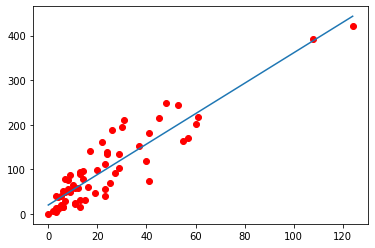

In [6]:
import matplotlib.pyplot as plt

def plot_data(xs, ys):
    lr = LinearRegressor()
    lr.fit(xs, ys)
    def f(x):
        a, b = lr.coeffs
        return a * x + b
    ls = np.linspace(min(xs), max(xs), 100)
    plt.plot(xs, ys, 'ro')
    plt.plot(ls, f(ls))
    plt.show()

plot_data(xs, ys)